# Task #1
***

Write a Python function called `sqrt2`that calculates and prints to the screen the square root of 2 to 100 decimal places.
***

### Solution for the Task #1

During the lecture it was introduced the Newton's method to calculate $\sqrt{2}$ without using any module from the standard Python library or otherwise. The code below was taken from the lecture:

In [4]:
# A function to calculate the square root of a number x.
def sqrt():
    """
    A function to calculate the square root of a number x
    """
    # Initial guess for the square root z
    x = 2
    z = x / 2
    # Loop until we're happy with the accuracy
    while abs(x - (z * z)) > 0.000001:
        # Calculate a better guess for the square root.
        z -= (z*z - x) / (2*z)
    # Return the (approximate) square root of x.   
    return z

In [5]:
sqrt()

1.4142135623746899

For this assessment I've choosen to show how to calculate $\sqrt{2}$ using a different method - **Binary Search**.

### CALCULATION OF $\sqrt{2}$ USING BINARY SEARCH 

In computer science, **Binary Search**, also known as half-interval search,[1] logarithmic search,[2] or binary chop,[3] is a search algorithm that finds the position of a target value within a sorted array. [1]

It compares the middle number of the array with the searched value. If the middle number equals the searched value, the position of the middle number is returned. If the middle number is bigger, the left portion of the array is searched using the same logic (binary search), else the right portion of the array is searched using binary search. [2].

To find a square root of the value 2, we are going to serch for a number that falls in the range between lowest boundary = 0 and highest boundary = 2.

In [6]:
# import decimal module 
# as the precision using the floating point numbers is limited. A Python float have about 16 decimals of precision. Hawever,
from decimal import *
#as per Task#1, the answer has to have 100 decimal places, therefore the precision is equal 100 [4].
getcontext().prec = 100

def sqrt2():
    """
    A function to calculate the square root of a number 2
    """
    # lowest boundary value is equal 0, and the highest is equal 2. The square root of 2 should be between these two values.
    num = Decimal(2)
    low = Decimal(0)
    high = num
    
    # Our initial guess value will be the middle value between highest & lowest boundaries.
    guess = (high - low) / 2
    
    # Looping until the guess value neither equal low nor equal high values:
    while guess != low and guess != high:
        # calculating square of the guess value
        sqr = guess * guess
        
        # if square root of the guessed number equal the initial num, break the loop
        if sqr == num:
            break
        # otherwise if sqrt is less than our number 2 the low is getting a new value, which is equal guess
        elif(sqr < num):
            low = guess
        # otherwise the high is getting a new value, which is equal guess
        else:
            high = guess
        # guess is getting a new middle value (the formula: low + (high - low) / 2 is used instead of (high - low) / 2 , to help avoid overflow of 32-big integer)
        guess = low + (high - low) / 2
    
    # if guess is equal one of value of the boundaries
    else:
        # checking if the difference between squared low boundary minus initial number 2 is less than the difference between squared high boundary minus 2
        if abs(low * low - num) < abs(high * high - num):
            # if true, low is getting a new value, which is equal guess
            guess = low
        else:
            # otherwise high is getting a new value
            guess = high
    # returning the answer
    return guess

# printing the answer to 100 decimal places:
print(sqrt2())

1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641573


# Task #2
***

The Chi-squared test for independence is a statistical hypothesis test like a t-test. It is used to analyse whether two categorical variables
are independent. The Wikipedia article gives the table below as an example [4], stating the Chi-squared value based on it is approximately 24.6. Use `scipy.stats`
to verify this value and calculate the associated p value.

|  | A | B | C | D | Total |
| --- | --- | --- | --- | --- | --- |
| White collar | 90 | 60 | 104 | 95 | 349 |
| Blue collar | 30 | 50 | 51 | 20 | 151 |
| No collar | 30 | 40 | 45 | 35 | 150 |
| Total collar | 150 | 150 | 200 | 150 | 650 |

***

The **Pearson’s Chi-Squared test**, or just **Chi-Squared test** for short, is named for Karl Pearson, although there are variations on the test.

The Chi-Squared test is a statistical hypothesis test that assumes (the null hypothesis) that the observed frequencies for a categorical variable match the expected frequencies for the categorical variable. The test calculates a statistic that has a chi-squared distribution, named for the Greek capital letter Chi $\chi$ pronounced “ki” as in kite.[10].

The result of the test is a test statistic that has a chi-squared distribution and can be interpreted to reject or fail to reject the assumption or null hypothesis that the observed and expected frequencies are the same.

We can interpret the test statistic in the context of the chi-squared distribution with the requisite number of degress of freedom as follows:

* If **Statistic >= Critical Value**: significant result, reject null hypothesis (H0), dependent.
* If **Statistic < Critical Value**: not significant result, fail to reject null hypothesis (H0), independent.

In terms of a p-value and a chosen significance level (alpha), the test can be interpreted as follows:

* If **p-value <= ignificance level**: significant result, reject null hypothesis (H0), dependent.
* If **p-value > ignificance level**: not significant result, fail to reject null hypothesis (H0), independent.

### Solution for the Task #1

Suppose there is a city of 1,000,000 residents with four neighborhoods: A, B, C, and D. A random sample of 650 residents of the city is taken and their occupation is recorded as "white collar", "blue collar", or "no collar". [4].

The null hypothesis is that each person's neighborhood of residence is independent of the person's occupational classification. 

The data are tabulated above in the Task #2 section.

In [12]:
import numpy as np
from scipy import stats
from scipy.stats import chi2

# Input the data.
white = [90, 60, 104, 95]
blue = [30, 50, 51, 20]
no = [30,  40,  45, 35]

# creating an array from the data above
table = np.array([white, blue, no])

# runing the Chi-squared test using scipy.stats library
# Chi2_st is chi-square statistic
# p_val is a p-value
# dof = degrees of freedom (is calculated by taking the number of rows minus one 
# and multiplying this result by the number of columns minus one)
# con_tbl is a contingency table with expected values based on all of our samples.
chi2_st, p_val, dof, con_tbl = stats.chi2_contingency(table)

# probability
prob = 0.95

#calculating the critical value
critical = chi2.ppf(prob, dof)

#Output
print("Initial table:")
print(table)
print("")
print("p-value = ",format(p_val, '.5f'))
print("Degrees of freedom = ",dof)
print("Chi-squared statistic = ", format(chi2_st, '.1f'))
print("Critical value = ", format(critical, '.1f'))

Initial table:
[[ 90  60 104  95]
 [ 30  50  51  20]
 [ 30  40  45  35]]

p-value =  0.00041
Degrees of freedom =  6
Chi-squared statistic =  24.6
Critical value =  12.6


P-value (0.00041) is less than the significance level (0.05), therefore it's statistically significant. This means there’s only about a 0.04% chance that we’d see this result if the person's neighborhood of residence were truly random.

The Chi-squared statistics is greater than the Critical value, therefore based on this we can reject the null hypothesis (H0), as the result is significant.

In [13]:
print("Contingency table")
print(con_tbl)

Contingency table
[[ 80.53846154  80.53846154 107.38461538  80.53846154]
 [ 34.84615385  34.84615385  46.46153846  34.84615385]
 [ 34.61538462  34.61538462  46.15384615  34.61538462]]


The contingency table produced values that are, in some cases, quite different comparing to the initial dataset. This is because we are using too small of a sample to accurate measure the population.

# Task #3
***

The standard deviation of an array of numbers x is calculated using numpy as `np.sqrt(np.sum((x - np.mean(x))**2)/len(x))`. However, Microsoft Excel has two different versions of the standard deviation calculation, `STDEV.P` and `STDEV.S`. The `STDEV.P` function performs the above calculation but in the `STDEV.S` calculation the division is by `len(x)-1` rather than `len(x)`. Research these Excel functions, writing a note in a Markdown cell about the difference between them. Then use `numpy` to perform a simulation demonstrating that the `STDEV.S` calculation is a better estimate for the standard deviation of a population when performed on a sample. 

*Note that part of this task is to figure out the terminology in the previous sentence.

MS Excel function `STDEV.S` function is used to calculate the standard deviation in the sample data set.
`STDEV.P` is used to calculate the standard deviation for the entire population.

`numpy.std()` function in Python returns the standard deviation, a measure of the spread of a distribution, of the array elements. 
The standard deviation is the square root of the average of the squared deviations from the mean, i.e., `std = sqrt(mean(x))`, where `x = abs(a - a.mean())**2`.

The average squared deviation is typically calculated as `x.sum()/N`, where `N = len(x)`. If, however, **ddof** (Delta Degrees of Freedom. By default ddof is zero) is specified, the divisor **N - ddof** is used instead. In standard statistical practice, **ddof=1** provides an unbiased estimator of the variance of the infinite population. **ddof=0** provides a maximum likelihood estimate of the variance for normally distributed variables. The standard deviation computed in this function is the square root of the estimated variance, so even with ddof=1, it will not be an unbiased estimate of the standard deviation per set.[20]



When dealing with statistical data, it is important to distinguish between "population" data sets and "sample" data sets: [20]
- A **population** data set contains all members of a specified group (the entire list of possible data values). 
- A **sample data** set contains a part, or a subset, of a population. The size of a sample is always less than the size of the population from which it is taken.

When calculating the standard deviation, it is important to know if you are working with an entire population (where you have all of the possible data), or if you are working with only a sample (a part) of the data. In addition, if you are using a sample of the data, you need to know if you will be making generalizations about the entire population, based upon this sample.

Use "population" when:
1. you know you have the entire population.
2. you have a sample of a larger population, but you are only interested in this sample (and you will not be generalizing your findings to the entire larger population).

Use "sample" when:
1. you have a sample of a larger population, and you wish to generalize your findings from this sample to the entire larger population from which this sample was taken. The sample will be used as an estimate of the population.

Difference between `STDEV.S` and `STDEV.P`:[23]
- The `STDEV.S` function is used when your data is a sample of entire population.
- The `STDEV.P` function is used when your data represents the entire population.
- In `STDEV.S` the squared deviation is divided by total number of sample -1. It is represented sa **N-1**.
- In `STDEV.P` function, the squared deviation is divided by total number of arguments, mostly represented as **N**. that is why, `STDEV.P` is smaller than `STDEV.S`. Since, `STDEV.P` function takes whole data, and some factors may dominate the result standard deviation. And Since it will be taken as the standard deviation for everyone in data, even for minorities, this is called Biased Analysis. This is why, this standard deviation is recommended to use only when analysis is non-destructive.
- The `STDEV.S` function is used on small sample of entire population, we subtract 1 from denominator (number of samples arguments). This is called non-biassed analysis of standard deviation. This is used when analysis is destructive.

The practice of dividing by `N - 1` (instead of `N`) when working with a sample of the entire population, produces a slight difference in the final calculation. This slight difference allows the sample to give a better mathematical estimate of the population. Think of dividing by `N - 1` (instead of `N`) in the sample as a means of "compensating" for the fact that we are working with a sample of the population, rather than with the entire population. It statistically gives the best estimate.[21]


## Currently working on it

In [63]:
N = 10
p = pd.Series(np.random.random(N))
p

0    0.593232
1    0.920815
2    0.697466
3    0.728002
4    0.575717
5    0.974802
6    0.419761
7    0.094903
8    0.823966
9    0.627576
dtype: float64

In [67]:
s = np.random.choice(p, 12)
s

array([0.72800192, 0.62757626, 0.97480202, 0.57571688, 0.92081545,
       0.62757626, 0.57571688, 0.69746632, 0.59323219, 0.09490312,
       0.41976055, 0.82396617])

In [70]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import statistics as sts
from random import random
from math import sqrt
import seaborn as sns

# Lets generate set of 1000 random floats in the half-open interval [0.0, 1.0).

N = 1000
population = pd.Series(np.random.random(N))

p_sd = np.std(population)
p_mean = np.mean(population)

# defining empty arrays
meanArray = []
avgArray = []
indexArray =[]
sampleNArray = []
sampleN1Array = []

# adding 0 as a default value:
total_mean = 0
avg_mean = 0
index = 0

# choosing 30 random numbers from the population 1000 times:
for k in range(1000):
    # lets choose sample of numbers
    sample = np.random.choice(population, 30)
    
    # calculate mean
    sample_mean=np.mean(sample)
    index = k+1
    total_mean = (total_mean + sample_mean)
    avg_mean = total_mean/(index)
    
    # appending data to the arrays
    meanArray.append(sample_mean)
    avgArray.append(avg_mean)
    indexArray.append(index)

    # calculate sd for n and n-1
    sample_sd_n = np.std(sample)
    sample_sd_n1 = np.std(sample, ddof=1)
    
    # appending data to the sample arrays
    sampleNArray.append(sample_sd_n)
    sampleN1Array.append(sample_sd_n1)
    
# printing out the Mean and Standard Deviation of the population:
print('Population Mean: ' + str(p_mean))
print('Population Standard deviation: ' + str(p_sd))

Population Mean: 0.5117631250686693
Population Standard deviation: 0.2885464674892778


C:\Users\I304319\Anaconda3_2020-07\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

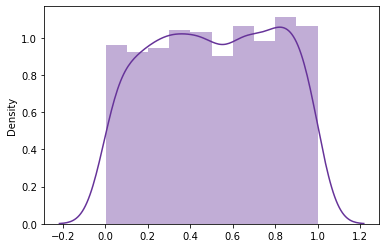

In [71]:
# visualisation of the population distribution
sns.distplot(population, color = "rebeccapurple")

As we expect, if we average all the sample means we can see that the it is a good estimate for the true population mean:

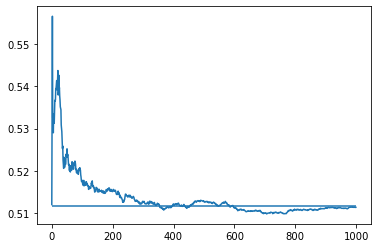

In [72]:
# from an array creating a data frame
df = DataFrame(meanArray, columns=['Sample_mean'])

# calculating the expanding mean values
exp_mean = df.expanding().mean()

# Plotting the population mean and expanding mean of the sample
plt.plot(exp_mean)
plt.hlines(p_mean, 0, 1000)

Now let's compare the results we would get by using the biased estimator (dividing by n) and the unbiased estimator (dividing by n−1)

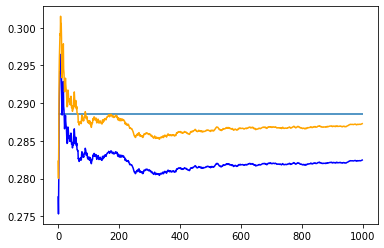

In [73]:
# creating two data frames: one contains biased estimator( division by N), another - unbiased (division by N-1)
ssd_NArray = DataFrame (sampleNArray, columns=['Sample_biased_sd'])
ssd_N1Array = DataFrame (sampleN1Array, columns=['Sample_unbiased_sd'])

# calculating the expanding means of each df
exp_ssd_N = ssd_NArray.expanding().mean()
exp_ssd_N1 = ssd_N1Array.expanding().mean()

# Plotting the results:
plt.plot(exp_ssd_N, color='blue')
plt.plot(exp_ssd_N1, color='orange')
plt.hlines(p_sd, 0, 1000)

As we can clearly see from the graph above, the biased estimator (blue line) is not estimating the true population variance as accurately as the unbiased estimator (orange line).

In [ ]:
plt.plot(exp_mean)
plt.hlines(myarray_mean, 0, 1000)

In [ ]:
exp_mean = meanArray.expanding().mean()

#### Reference List:

[1]. Binary search algorythm. https://en.wikipedia.org/wiki/Binary_search_algorithm#:~:text=In%20computer%20science%2C%20binary%20search,middle%20element%20of%20the%20array. 8 Nov 2020
[2]. Square Root using Binary Search: https://algotree.org/algorithms/binary_search/squareroot/ 26 Oct 2020
[2a]. Finding the Square Root of a number using Binary Search (Java). https://stackoverflow.com/questions/61936060/finding-the-square-root-of-a-number-by-using-binary-search 26 Oct 2020

[3]. Find square root of a number using Binary Search algorithm https://www.techiedelight.com/find-square-root-using-binary-search-algorithm/ 26 Oct 2020
[4]. Wikipedia contributors, “Chi-squared test — Wikipedia, the free encyclopedia,”
2020, [Online; accessed 1-November-2020]. [Online]. Available: https://en.wikipedia.
org/w/index.php?title=Chi-squared test&oldid=983024096
[5]. Decimal fixed point and floating point arithmetics https://docs.python.org/3/library/decimal.html

[1]. How do I write a program for finding the square root of a number without using the sqrt function?. https://www.quora.com/How-do-I-write-a-program-for-finding-the-square-root-of-a-number-without-using-the-sqrt-function
[2]. https://algotree.org/algorithms/binary_search/squareroot/
[3]. https://codereview.stackexchange.com/questions/226340/compute-the-square-root-of-a-positive-integer-using-binary-search
[4]. Java: https://stackoverflow.com/questions/61936060/finding-the-square-root-of-a-number-by-using-binary-search
[5]. Python, Java and C: https://www.xspdf.com/resolution/54877450.html
[6]. https://inginious.org/course/competitive-programming/binsearch-squareroot
[7]. https://www.techiedelight.com/find-square-root-using-binary-search-algorithm/
[8]. C: https://stackoverflow.com/questions/40849402/using-binary-search-to-find-the-square-root-of-a-number-in-c/40849680
[9]. https://stackoverflow.com/questions/52176199/binary-search-for-square-root-2
[10]. https://www.geeksforgeeks.org/find-square-root-number-upto-given-precision-using-binary-search/


[10]. A Gentle Introduction to the Chi-Squared Test for Machine Learning. https://machinelearningmastery.com/chi-squared-test-for-machine-learning/ (8 Nov 2020)
[11]. Running Ch-Square Tests with Die Roll Data in Python. https://towardsdatascience.com/running-chi-square-tests-in-python-with-die-roll-data-b9903817c51b 8 Nov 2020
[12]. SciPy.org. Scipy.stats.ch2_contingency. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html 8 Nov 2020
[13]. Chi-square test in Python. https://reneshbedre.github.io/blog/chisq.html#:~:text=cured%20and%20noncured)-,Chi%2Dsquare%20(%CF%872)%20Goodness%20of%20Fit%20test,on%20the%20known%20theoretical%20expectation. 8 Nov 2020
[14]. A Gentle Introduction to the Chi-Squared Test for Machine Learning. https://machinelearningmastery.com/chi-squared-test-for-machine-learning/ (8 Nov 2020)
[15]. SciPy.org. Scipy.stats.chi2. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html. 8 Nov 2020

[20]. Numpy. https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html 24 Nov 2020
[21]. Population vs Sample Data. http://mathbitsnotebook.com/Algebra1/StatisticsData/STPopSample.html 24 Nov 2020
[22]. Churn_Modelling.csv https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling 24 Nov 2020
[23]. How to use the STDEV.S Function in Excel. https://www.exceltip.com/statistical-formulas/how-to-use-stdev-s-function-in-excel.html 24 Nov 2020
[24]. Computing Sample Variance: Why Divide by N - 1?. https://mortada.net/computing-sample-variance-why-divide-by-n-1.html 24 Nov 2020


[11]. LaTex. https://en.wikibooks.org/wiki/LaTeX/Mathematics. 26 Oct 2020
[12]. Markdown in Jupyter Notebook. https://www.datacamp.com/community/tutorials/markdown-in-jupyter-notebook?utm_source=adwords_ppc&utm_campaignid=898687156&utm_adgroupid=48947256715&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034349&utm_targetid=aud-392016246653:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=20489&gclid=CjwKCAjwoc_8BRAcEiwAzJevtX4RINIUMp_KK-_GyNV1X-ptLEtPDfvJ9VBN2BUdNU4cR-XXIoXPBxoCNYwQAvD_BwE 26 Oct 2020